In [24]:
import pandas as pd
import numpy as np

#importing
df=pd.read_csv('D:/Tyler_Data/Other Skills/Datascience/MMDT_GitHub/MMDT_2025_MLAI101/Htet-Aung-Phyo/Polyregression_Model/house_data_fs.csv', index_col = 0)
print(df.info())

#dropping na 
df = df.dropna()
print(df.info())

#copying to df1
df1 = df.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   bedrooms     21600 non-null  float64
 2   sqft_living  21613 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 675.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21600 non-null  int64  
 1   bedrooms     21600 non-null  float64
 2   sqft_living  21600 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 675.0 KB
None


### Linear regression model using a single feature

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# creating dataframe
model_df =pd.DataFrame(columns=['name','weight','intercept','mae','mse','r_squared'])

# feature (X) = sqft_living, target (y) = price
X = df1['sqft_living'].values
y = df1['price'].values

#scaling to X (x-u/std)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
lr_model = lr.fit(X_scaled, y)

# finding mae,mse and r2 for training data
Y_pred = lr_model.predict(X_scaled)

rscore = r2_score(y, Y_pred)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
#print('Weight:',lr_model.coef_[0],'\nIntercept',lr_model.intercept_)
#print('r2-score:', np.round(rscore,4), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

model_df.loc[0] = ['linear',lr.coef_,lr.intercept_, mae, mse, rscore]
print(model_df)

     name                weight  intercept            mae           mse  \
0  linear  [211051.60498043548]   532438.6  161171.373786  6.218585e+10   

   r_squared  
0   0.417346  


### Visualization for Linear Regression model

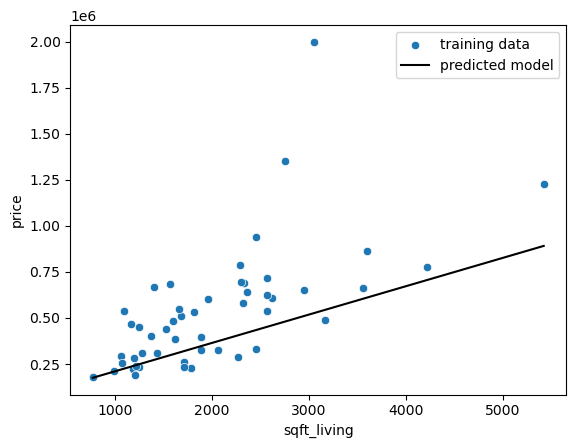

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = lr_model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### multiple linear regression

In [27]:
#setting X and Y
X_mlr = df1[['bedrooms', 'sqft_living']].values
Y_mlr= df1['price'].values

Xmlr_scaled = scaler.fit_transform(X_mlr)

lr = LinearRegression()
mlr = lr.fit(Xmlr_scaled, Y_mlr)

Y_pred = mlr.predict(Xmlr_scaled)
rscore = r2_score(Y_mlr, Y_pred)
mse = mean_squared_error(Y_mlr, Y_pred)
mae = mean_absolute_error(Y_mlr, Y_pred)

#print('Weight:',mlr.coef_,'\nIntercept',mlr.intercept_)

model_df.loc[1] = ['multiple linear',mlr.coef_, mlr.intercept_, mae, mse, rscore]
print(model_df)

              name                                    weight  intercept  \
0           linear                      [211051.60498043548]   532438.6   
1  multiple linear  [-26757.45409906282, 223290.30055579514]   532438.6   

             mae           mse  r_squared  
0  161171.373786  6.218585e+10   0.417346  
1  164763.130762  6.161967e+10   0.422651  


### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

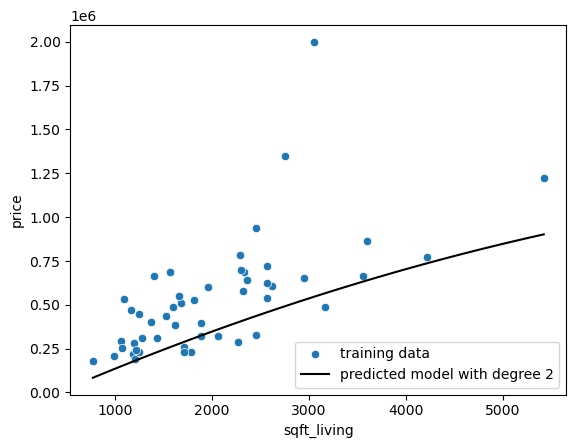

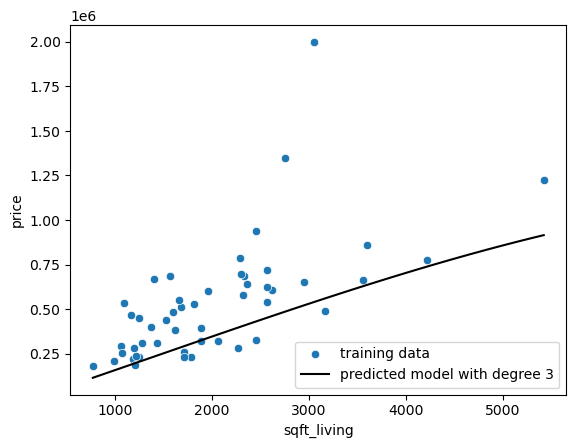

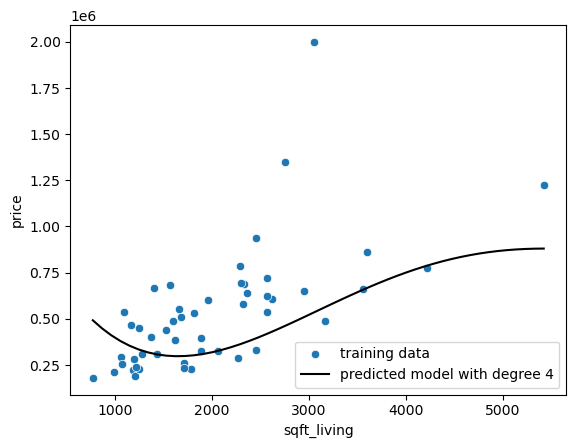

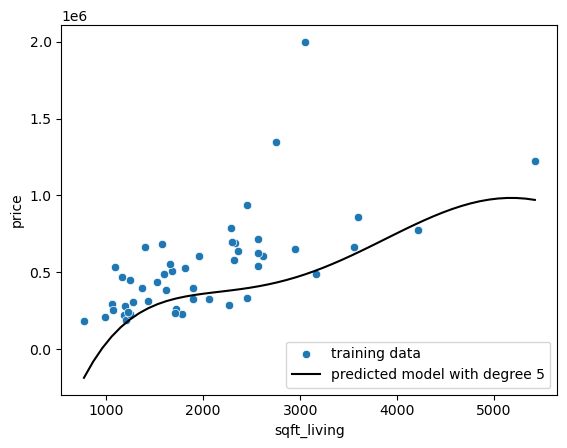

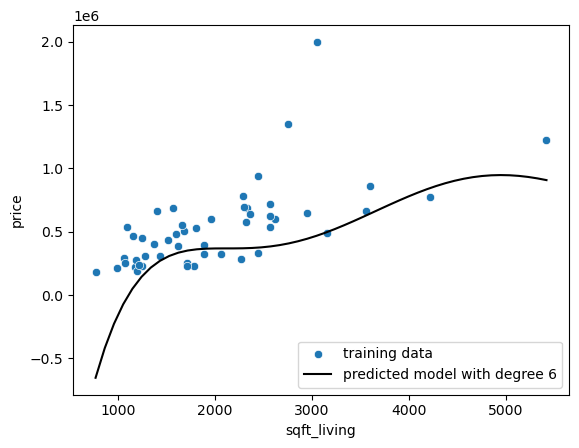

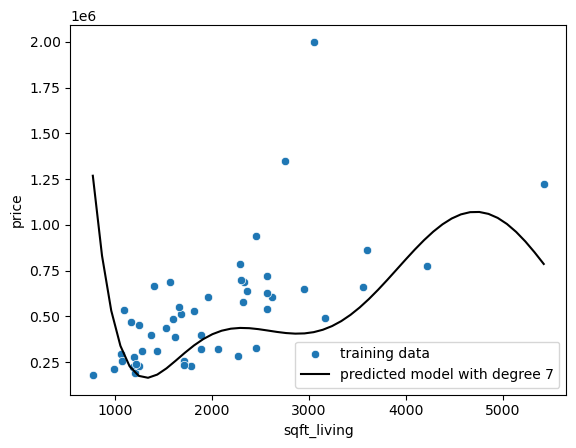

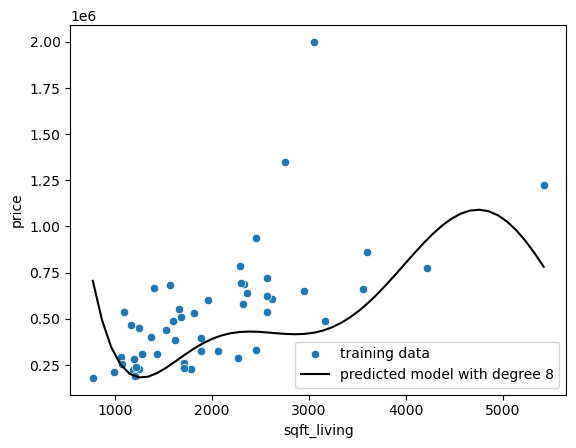

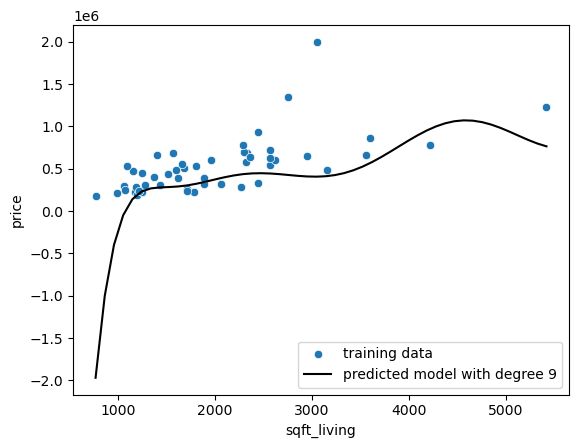

              name                                             weight  \
0           linear                               [211051.60498043548]   
1  multiple linear           [-26757.45409906282, 223290.30055579514]   
2           poly 2             [240878.6350629136, -21125.6694793064]   
3           poly 3  [244524.71676972017, -11338.05354779307, -3090...   
4           poly 4  [340905.7693064535, -2734.058690532991, -78582...   
5           poly 5  [303012.0298412616, 191876.41167818173, -44143...   
6           poly 6  [368957.04102961055, 264710.96926075, -161746....   
7           poly 7  [190380.98580292086, 698296.7943453585, 250209...   
8           poly 8  [169212.24122910152, 605499.5395207467, 338310...   
9           poly 9  [68715.66207942506, 831487.4695023518, 812700....   

       intercept            mae           mse  r_squared  
0  532438.600000  161171.373786  6.218585e+10   0.417346  
1  532438.600000  164763.130762  6.161967e+10   0.422651  
2  553564.269479  1

In [28]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
index = 2

#setting X and y
X = df1['sqft_living'].values
y = df1['price'].values

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

for order in range(2,10):

    #poly tranformation
    poly = PolynomialFeatures(degree=order, include_bias=False)
    poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

    #modeling
    lr = LinearRegression()
    poly_model = lr.fit(poly_features,y)

    #regression
    Y_pred = poly_model.predict(poly_features)
    rscore = r2_score(y,Y_pred)
    mse = mean_squared_error(y, Y_pred)
    mae = mean_absolute_error(y, Y_pred)

    model_name = 'poly '+str(order)
    model_df.loc[index] = [model_name,poly_model.coef_, poly_model.intercept_, mae, mse, rscore]
    index +=1

    sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
    x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
    x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))
    x_model_poly  = poly.fit_transform(x_model_scaled)
    y_model = poly_model.predict(x_model_poly)
    plt.plot(x_model,  y_model, color = 'k')
    plt.legend(['training data', 'predicted model with degree ' + str(order)])
    plt.show()

print(model_df)


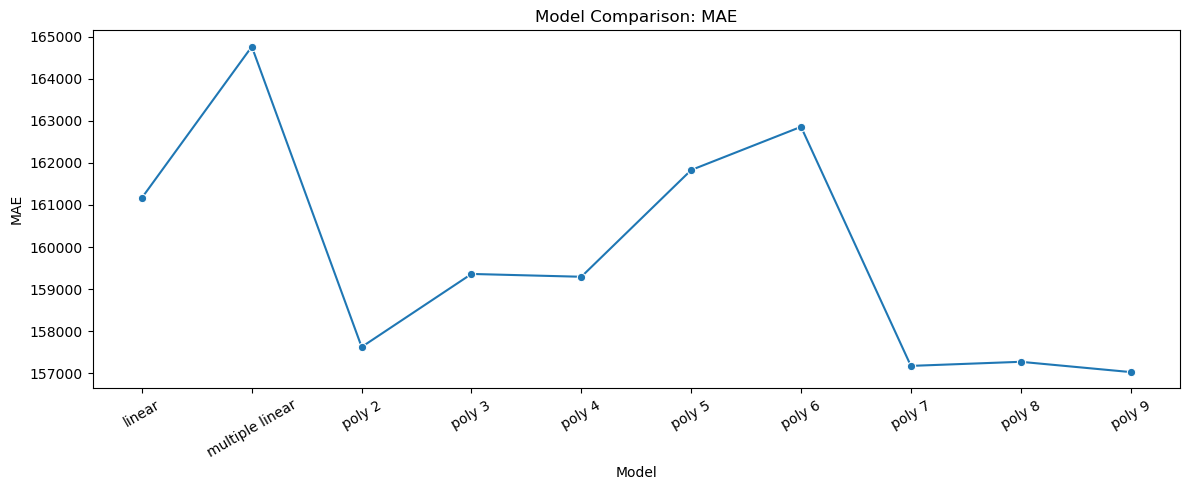

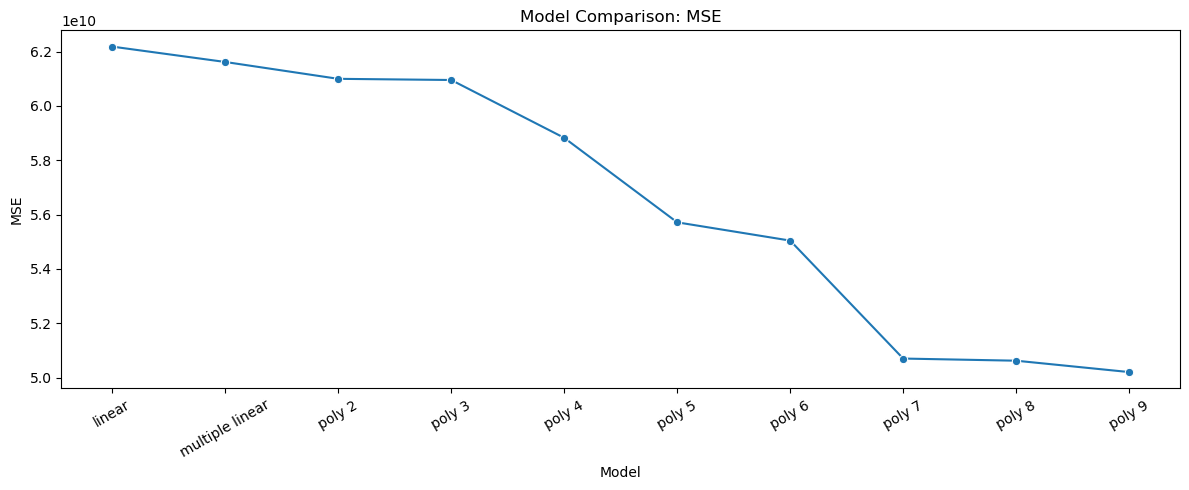

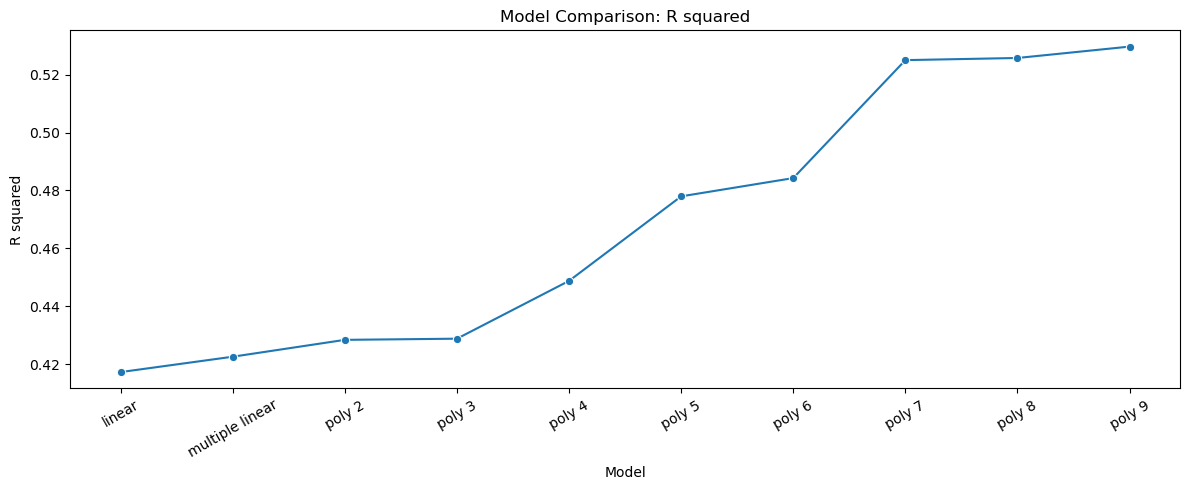

In [29]:
metric_df = model_df[['name', 'mae','mse', 'r_squared']]

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=metric_df, x='name', y='mae', marker='o')
plt.title('Model Comparison: MAE')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=metric_df, x='name', y='mse', marker='o')
plt.title('Model Comparison: MSE')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=metric_df, x='name', y='r_squared', marker='o')
plt.title('Model Comparison: R squared')
plt.ylabel('R squared')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Saving Best Model for Deployment

In [30]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
best_model = lr.fit(poly_features, y)

joblib.dump(best_model,'best_model.pkl')

Y_pred = best_model.predict(poly_features)
rscore = best_model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
print('r2-score:', np.round(rscore,2), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


r2-score: 0.43 
mean squared error: 60999286388.0 
mean absolute error: 157625.0


### Visualization for Poly regression

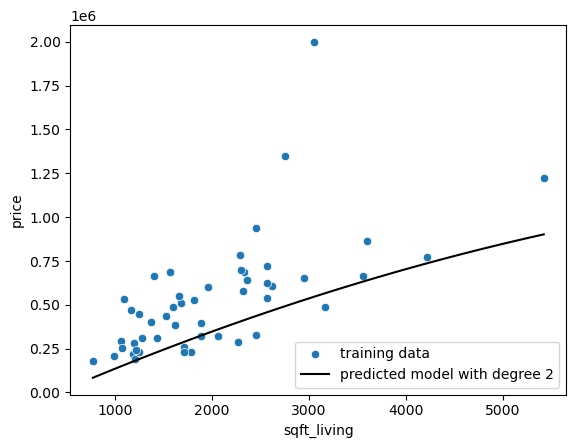

In [31]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(best_order)])
plt.show()

a) Which model gives you better performance: Multiple Linear Regression or Polynomial Regression?
Provide evidence from your analysis (such as R-squared, Mean Squared Error, or other performance metrics) and explain your reasoning. Be sure to compare the results from both models and justify why one might perform better than the other based on the dataset and problem you're solving.

Solution
Based on the comparison using R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE), Polynomial Regression seemed better Multiple Linear Regression in this case. R-squared polynomial regression was higher and MSE and MAE were generally lower for polynomial regression. Thus, it can be concluded that the relationship between sqft_living and price is likely nonlinear, and a polynomial transformation is able to better represent this pattern than a simple linear model. Therefore, polynomial regression is the better choice for this dataset.

b)How do you decide the optimal degree for Polynomial Regression in this case?
Explain how you determined the degree of the polynomial and what criteria you used to decide whether a higher degree improves the model's performance. Discuss the potential risks of choosing too high or too low a degree for the polynomial.

Solution:
To determine the optimal degree, I evaluated the model's performance of different polynomial degrees(2 to 9)using R-squared MSE, and MAE. As the degree increases, R² increased and MSE decreased — indicating better fit to the training data. However, MAE fluctuated, and the lowest MAE was achieved at degree 2. Higher degrees (7–9) provided slightly better R², but the marginal gains were small, and the risk of overfitting increased significantly.
Thus, degree 2 was chosen as the optimal point because it gives strong performance metrics without excessive model complexity and avoids overfitting.